In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("C:/Users/gptsorab/Desktop/houserentprediction/Indian_House_Rent_Dataset.csv")

In [10]:
df.head()

,Posted On,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Rent
0,NaN,2.0,1100.0,NaN,Super Area,Bandel,India-! Kolkata,Unfurnished,Bach^elors/Fam.ily,2.0,Contact Owner,10000
1,2022-05-13,2.0,800.0,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",India-! Kolkata,Semi-Furnished,Bachelors\/Family*,NaN,NaN,20000
2,2022-05-16,2.0,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,India-- Kolkata,Semi-Furnished,NaN,1.0,Contact Owner,17000
3,2022-07-04,2.0,800.0,1 out of 2,Super Area,NaN,NaN,Unfurnished,Bachel]ors/F@amily,1.0,NaN,10000
4,2022-05-09,2.0 room,850.0,1 out of 2,Carpet Area,South Dum Dum,India-^ Kolkata,Unfurnished,Bache[lors&,1.0,Contact Owner,7500


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4084 non-null   object
 1   BHK                3963 non-null   object
 2   Size               3826 non-null   object
 3   Floor              3960 non-null   object
 4   Area Type          3804 non-null   object
 5   Area Locality      4146 non-null   object
 6   City               4091 non-null   object
 7   Furnishing Status  4042 non-null   object
 8   Tenant Preferred   4094 non-null   object
 9   Bathroom           4205 non-null   object
 10  Point of Contact   4137 non-null   object
 11  Rent               4746 non-null   int64 
dtypes: int64(1), object(11)
memory usage: 445.1+ KB


In [12]:
df.describe()

,Rent
count,4.746000e+03
mean,3.499345e+04
std,7.810641e+04
min,1.200000e+03
25%,1.000000e+04
50%,1.600000e+04
75%,3.300000e+04
max,3.500000e+06


In [13]:
df.isnull().sum()

Posted On            662
BHK                  783
Size                 920
Floor                786
Area Type            942
Area Locality        600
City                 655
Furnishing Status    704
Tenant Preferred     652
Bathroom             541
Point of Contact     609
Rent                   0
dtype: int64

In [14]:
df['BHK'].unique()

array(['2.0', '2.0 room', '1.0', nan, '3.0', '1.0 room', '6.0', '4.0',
       '3.0 room', '5.0', '5.0 room', '4.0 room', '6.0 room'],
      dtype=object)

In [17]:
df['BHK'] = df['BHK'].str.extract(r'(\d+)')
df['BHK'].unique()

array(['2', '1', nan, '3', '6', '4', '5'], dtype=object)

In [18]:
df['BHK'].value_counts()

BHK
2    1921
1     947
3     911
4     162
5      17
6       5
Name: count, dtype: int64

In [26]:
df['BHK'] = pd.to_numeric(df['BHK'])
df['Size'].unique()

array(['1100.0', '800.0', '1000.0', '850.0', '600.0', '700.0', '250.0',
       nan, '1200.0', '400.0', '375.0', '900.0', '1286.0', '2000.0',
       '650.0', '300.0', '1600.0', '355.0', '350.0', '550.0', '500.0',
       '630.0', '270.0', '1500.0', '1068.0', '150.0', '450.0', '720.0',
       '680.0', '950.0', '1800.0', '480.0', '435.0', '1300.0', '1450.0',
       '750.0', '220.0', '20.0', '200.0', '840.0', '740.0', '490.0',
       '280.0', '120.0', '1220.0', '670.0', '240.0', '2200.0', '685.0',
       '44.0', '392.0', '710.0', '1400.0', '160.0', '1250.0', '839.0',
       '230.0', '620.0', '1350.0Square Feet', '723.0', '320.0', '2160.0',
       '1700.0', '130.0', '505.0', '4000.0', '1190.0', '1012.0', '812.0',
       '420.0', '1750.0', '830.0', '1050.0', '960.0', '756.0', '288.0',
       '1600.0Square Feet', '986.0', '322.0', '957.0', '1430.0', '1320.0',
       '650.0Square Feet', '475.0', '550.0Square Feet', '570.0', '460.0',
       '530.0', '850.0Square Feet', '558.0', '175.0', '721.0',

In [28]:
df['Size'] = df['Size'].str.extract(r'(\d+)')
df['Size'].unique()

array(['1100', '800', '1000', '850', '600', '700', '250', nan, '1200',
       '400', '375', '900', '1286', '2000', '650', '300', '1600', '355',
       '350', '550', '500', '630', '270', '1500', '1068', '150', '450',
       '720', '680', '950', '1800', '480', '435', '1300', '1450', '750',
       '220', '20', '200', '840', '740', '490', '280', '120', '1220',
       '670', '240', '2200', '685', '44', '392', '710', '1400', '160',
       '1250', '839', '230', '620', '1350', '723', '320', '2160', '1700',
       '130', '505', '4000', '1190', '1012', '812', '420', '1750', '830',
       '1050', '960', '756', '288', '986', '322', '957', '1430', '1320',
       '475', '570', '460', '530', '558', '175', '721', '2210', '675',
       '1880', '640', '518', '777', '2308', '890', '888', '275', '424',
       '610', '722', '1150', '470', '410', '932', '560', '3000', '751',
       '696', '2500', '715', '1337', '737', '760', '365', '1330', '2600',
       '1783', '565', '1080', '825', '1545', '780', '695', '

In [29]:
df['Size'] = pd.to_numeric(df['Size'])
df['Size'].describe()

count    3826.000000
mean      967.802405
std       627.895502
min        10.000000
25%       551.250000
50%       845.500000
75%      1200.000000
max      7000.000000
Name: Size, dtype: float64

In [30]:
df['Floor'].unique()

array([nan, '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 2',
       'Ground out of 3', '2 out of 3', '4 out of 5', '2 out of 2',
       '2 out of 5', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       'Ground out of 6', 'Upper Basement out of 4', 'Ground out of 5',
       '3 out of 5', '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '18 out of 24', '3 out of 7', '17 out of 31', '11 out of 21',
       '14 out of 23', '19 out of 24', '3 out of 21', '8 out of 8',
       '6 out of 12', '4 out of 58', '60 out of 66', '34 out of 48',
       '5 out of 8', '14 out of 40', '5 out of 7', '26 out of 44',
       '1 out of 8', '25 out of 42', '25 out of 41', '53 out of 

In [32]:
df['Floor_number'] = df['Floor'].str.split(" out of ").str[0]
df['Total_Floors'] = df['Floor'].str.split(" out of ").str[1]
df['Floor_number'].unique()

array([nan, '1', 'Ground', '2', '4', '3', '5', '7', 'Upper Basement',
       '11', 'Lower Basement', '6', '14', '43', '13', '18', '17', '19',
       '8', '60', '34', '26', '25', '53', '16', '39', '10', '12', '32',
       '47', '28', '9', '20', '15', '65', '40', '37', '21', '30', '35',
       '22', '44', '41', '46', '27', '48', '50', '24', '29', '23', '36',
       '76', '45'], dtype=object)

In [33]:
df['Floor_number'].replace({'Ground': 0 ,'Upper Basement':-1 , 'Lower Basement':-2}, inplace=True)
df['Floor_number'].unique()

array([nan, '1', 0, '2', '4', '3', '5', '7', -1, '11', -2, '6', '14',
       '43', '13', '18', '17', '19', '8', '60', '34', '26', '25', '53',
       '16', '39', '10', '12', '32', '47', '28', '9', '20', '15', '65',
       '40', '37', '21', '30', '35', '22', '44', '41', '46', '27', '48',
       '50', '24', '29', '23', '36', '76', '45'], dtype=object)

In [34]:
df['Total_Floors'].unique()

array([nan, '3', '2', '1', '4', '5', '8', '6', '19', '10', '14', '7',
       '13', '78', '18', '24', '31', '21', '23', '12', '58', '66', '48',
       '40', '44', '42', '41', '20', '60', '32', '89', '30', '15', '16',
       '11', '28', '22', '17', '45', '35', '9', '75', '38', '51', '43',
       '25', '27', '76', '36', '37', '55', '68', '29', '26', '50', '62',
       '52', '54', '33', '46', '85', '71', '81', '34'], dtype=object)

In [35]:
df['Floor_number'] = pd.to_numeric(df['Floor_number'])
df['Total_Floors'] = pd.to_numeric(df['Total_Floors'])
df['Area Type'].unique()

array(['Super Area', 'Carpet Area', nan, 'CARPET AREA', 'SUPER AREA',
       'Built Area'], dtype=object)

In [36]:
df['Area Type'] = df['Area Type'].str.capitalize()
df['Area Type'].unique()

array(['Super area', 'Carpet area', nan, 'Built area'], dtype=object)

In [37]:
df['Area Locality'].sample(20)

98                                          Bagbazar
1051                  Gaurav Heights, Kandivali West
1408                      K Raheja Maple Leaf, Powai
3762                                      Vadapalani
1336                         L&T Emerald Isle, Powai
1956                                        Hulimavu
1592                                        Abbigere
493                          Salt Lake City Sector 2
1039                                         Chembur
4283    Alkapur Township, Manikonda, Outer Ring Road
3401                                   Thiruvanmiyur
1328                   Greenfields CHS, Andheri East
2977                                        Bindapur
1017                          Sindhi Society Chembur
4010                                   Santosh Nagar
4447                                Boduppal, NH 2 2
2260                                 Ullal Main Road
1747                                 Electronic City
4167                              Basheer Bagh

In [38]:
df['City'].unique()

array(['India-! Kolkata', 'India-- Kolkata', nan, 'India-^ Kolkata',
       'India-\\ Kolkata', 'India-% Kolkata', ',-9 Kolkata',
       'India-/ Kolkata', '(-9 Kolkata', '^-9 Kolkata', '--9 Kolkata',
       'India-* Kolkata', 'India-; Kolkata', 'India-. Kolkata',
       '!-9 Kolkata', ':-9 Kolkata', '\\-9 Kolkata', ';-9 Kolkata',
       'India-> Kolkata', '.-9 Kolkata', 'India-@ Kolkata',
       'India-{ Kolkata', 'India-[ Kolkata', 'India-| Kolkata',
       'India-} Kolkata', '"-9 Kolkata', '|-9 Kolkata', "'-9 Kolkata",
       '>-9 Kolkata', 'India-? Kolkata', '}-9 Kolkata', '#-9 Kolkata',
       'India-$ Kolkata', ']-9 Kolkata', 'India-< Kolkata', '$-9 Kolkata',
       'India-] Kolkata', '<-9 Kolkata', 'India-: Kolkata',
       'India-# Kolkata', 'India-+ Kolkata', '+-9 Kolkata',
       'India-& Kolkata', 'India-, Kolkata', '%-9 Kolkata',
       'India-( Kolkata', 'India-_ Kolkata', '@-9 Kolkata', '=-9 Kolkata',
       'India-" Kolkata', '/-9 Kolkata', '_-9 Kolkata', '?-9 Kolkata',


In [39]:
df['City'] = df['City'].str.split(' ').str[1]
df['City'].unique()

array(['Kolkata', nan, 'Mumbai', 'Bangalore', 'Delhi', 'Chennai',
       'Hyderabad'], dtype=object)

In [40]:
df['Furnishing Status'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished', nan], dtype=object)

In [41]:
df['Tenant Preferred'].unique()

array(['Bach^elors/Fam.ily', 'Bachelors\\/Family*', nan, ...,
       '!Bachelors+/Family', '$Family%', 'Bachelo%rs:'], dtype=object)

In [43]:
df['Tenant Preferred'] = df['Tenant Preferred'].str.replace(r'[^a-zA-Z]', '', regex=True)
df['Tenant Preferred'].unique()

array(['BachelorsFamily', nan, 'Bachelors', 'Family'], dtype=object)

In [44]:
df['Tenant Preferred'] = df['Tenant Preferred'].str.replace('BachelorsFamily', 'Bachelors/Family')
df['Tenant Preferred'].unique()

array(['Bachelors/Family', nan, 'Bachelors', 'Family'], dtype=object)

In [45]:
df['Bathroom'].unique()

array(['2.0', nan, '1.0', '1.0 Bathrooms', '2.0 Bathrooms', '3.0', '4.0',
       '5.0', '3.0 Bathrooms', '5.0 Bathrooms', '6.0', '4.0 Bathrooms',
       '7.0', '10.0'], dtype=object)

In [ ]:
df['Bathroom'] = df['Bathroom'].str.extract(r'(\d+)')
df['Bathroom'] = pd.to_numeric(df['Bathroom'])

In [48]:
df['Point of Contact'].unique()

array(['Contact Owner', nan, 'Contact Agent'], dtype=object)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4084 non-null   object 
 1   BHK                3963 non-null   float64
 2   Size               3826 non-null   float64
 3   Floor              3960 non-null   object 
 4   Area Type          3804 non-null   object 
 5   Area Locality      4146 non-null   object 
 6   City               4091 non-null   object 
 7   Furnishing Status  4042 non-null   object 
 8   Tenant Preferred   4094 non-null   object 
 9   Bathroom           4205 non-null   float64
 10  Point of Contact   4137 non-null   object 
 11  Rent               4746 non-null   int64  
 12  Floor_number       3960 non-null   float64
 13  Total_Floors       3957 non-null   float64
dtypes: float64(5), int64(1), object(8)
memory usage: 519.2+ KB


In [50]:
df.columns

Index(['Posted On', 'BHK', 'Size', 'Floor', 'Area Type', 'Area Locality',
       'City', 'Furnishing Status', 'Tenant Preferred', 'Bathroom',
       'Point of Contact', 'Rent', 'Floor_number', 'Total_Floors'],
      dtype='object')

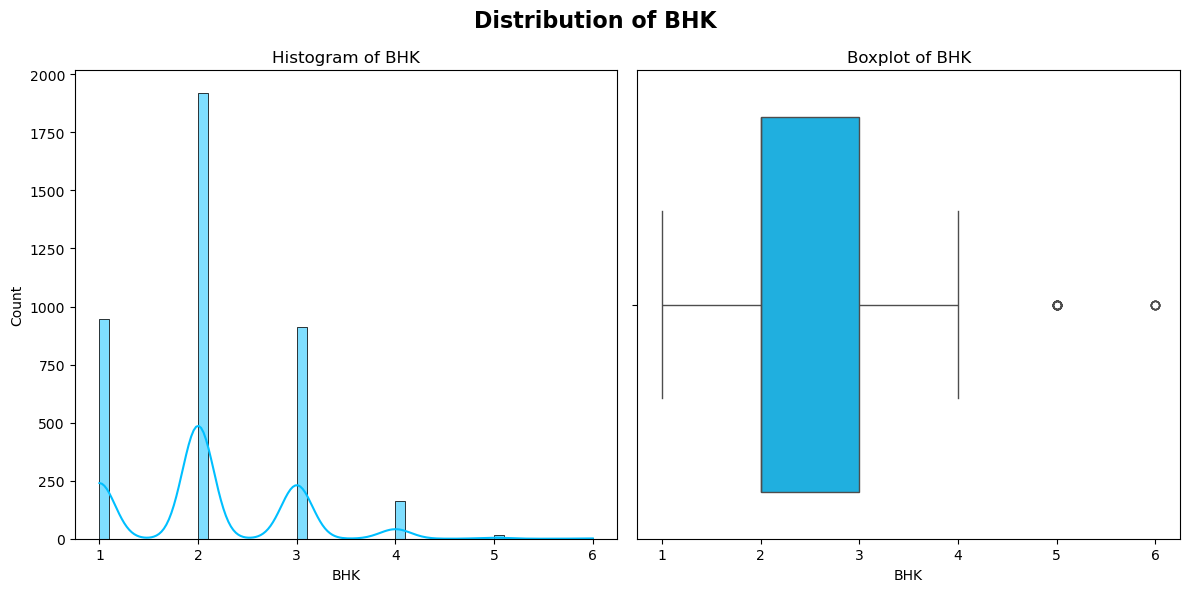

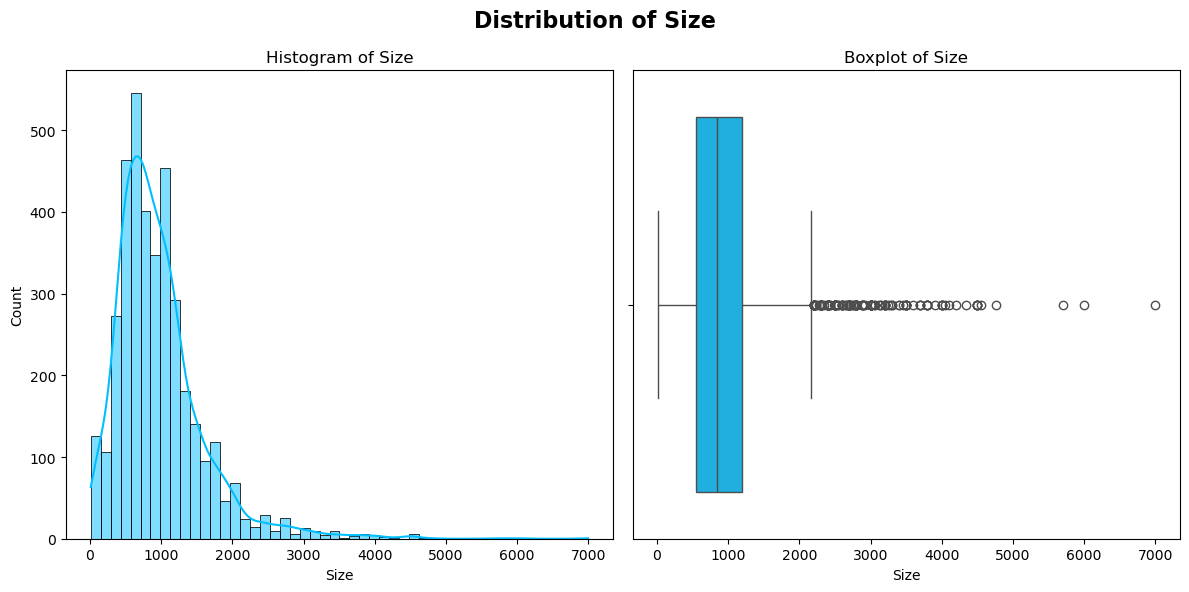

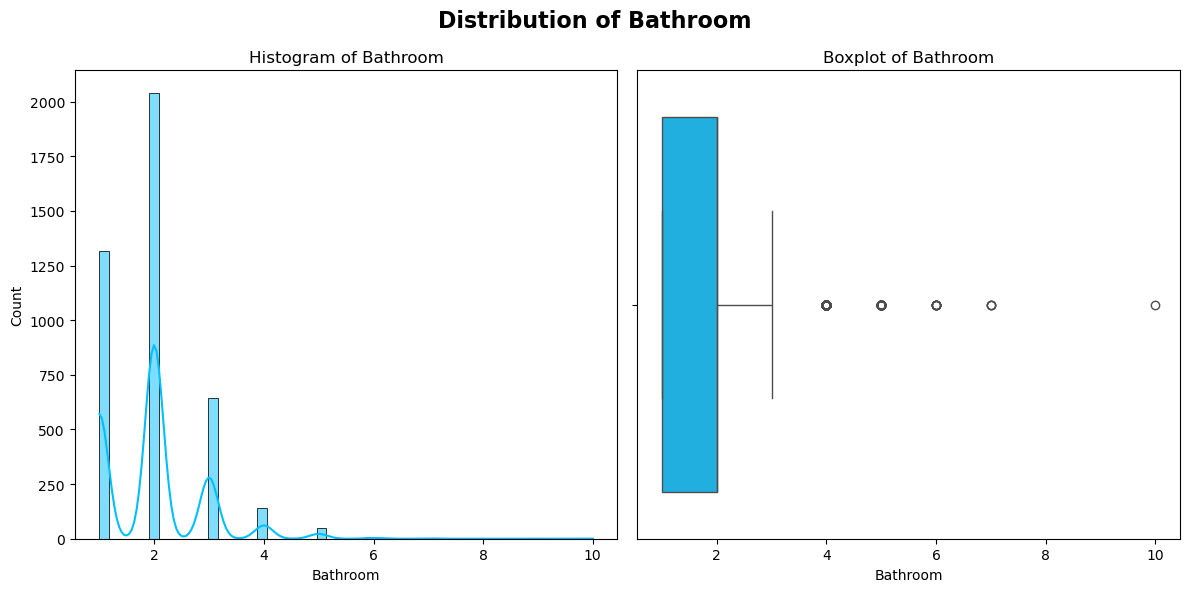

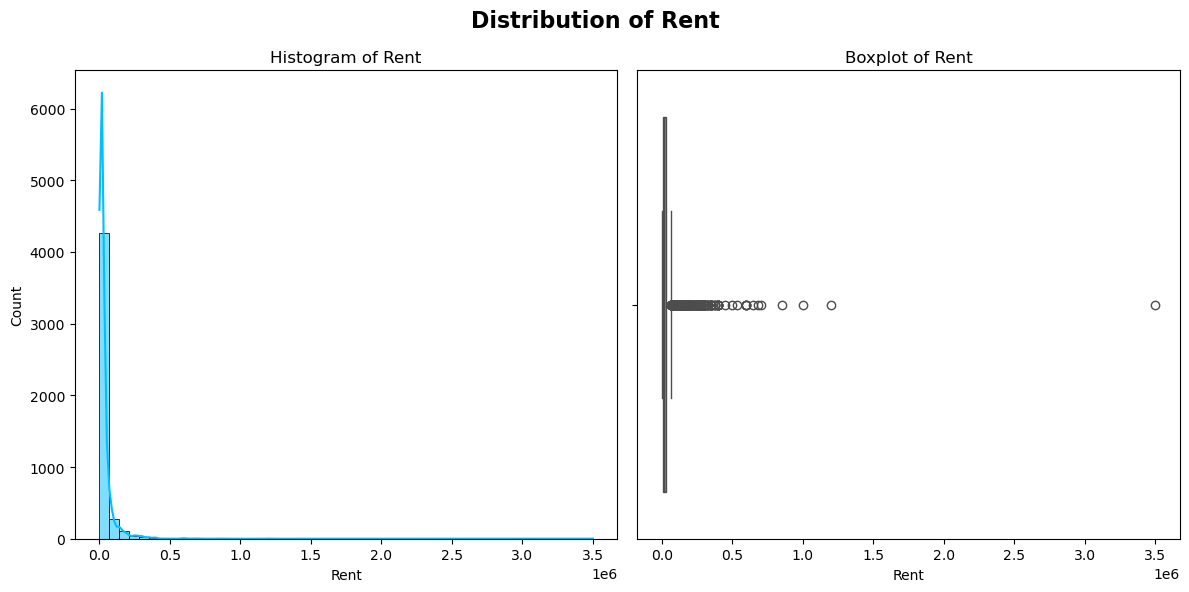

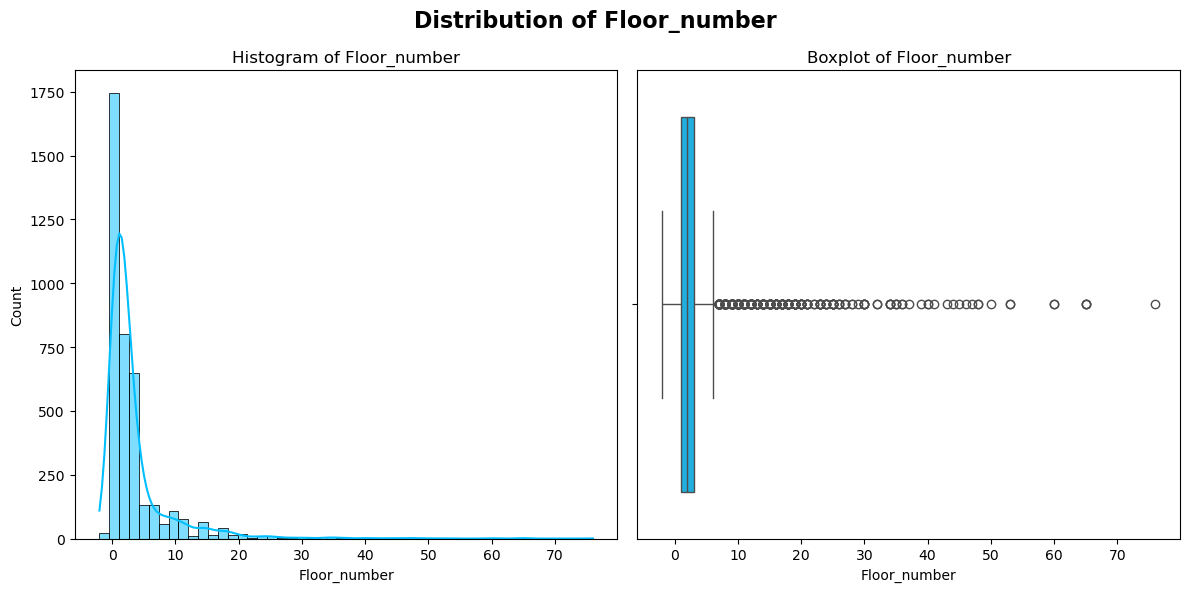

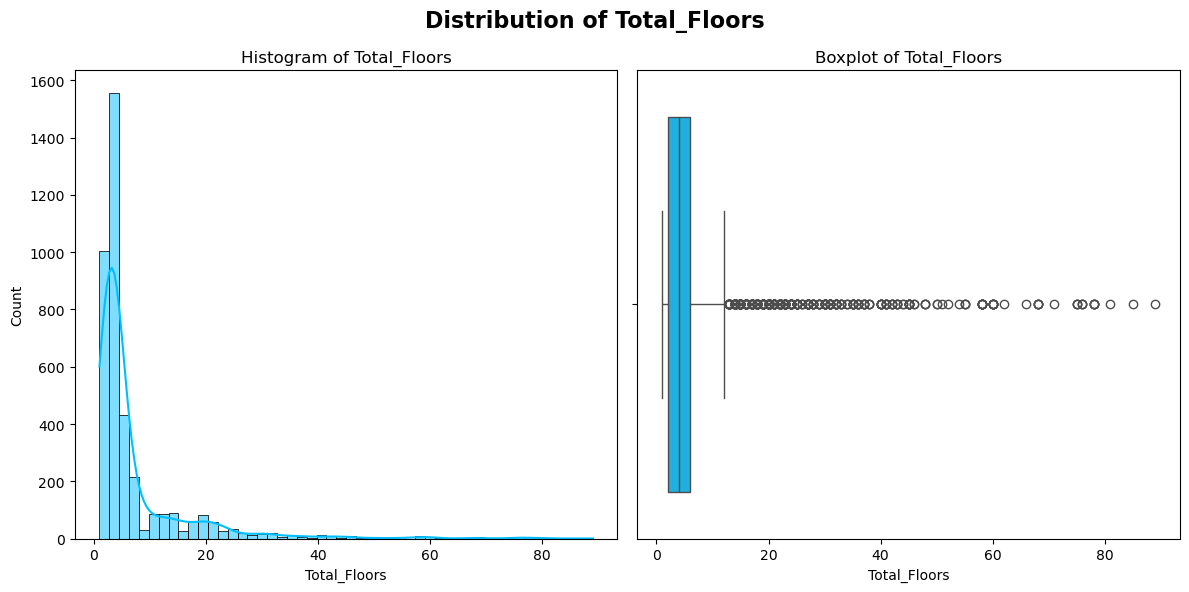

In [51]:
def num_plot(column):
  fig, ax = plt.subplots(1, 2, figsize = (12,6))
  # ax = ax.flatten()
  fig.suptitle(f"Distribution of {column}", fontsize=16, fontweight='bold')
  sns.histplot(x=column, data=df, bins = 50,kde=True, edgecolor='black', ax=ax[0],color = 'deepskyblue')
  ax[0].set_title(f"Histogram of {column}")
  sns.boxplot(x=column, data=df, ax=ax[1],color = 'deepskyblue')
  ax[1].set_title(f"Boxplot of {column}")
  plt.tight_layout()
  plt.show()
num_columns = df.select_dtypes(include=['number']).columns
for column in num_columns:
    num_plot(column)

In [52]:
df.select_dtypes(include=['object', 'category']).columns

Index(['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Point of Contact'],
      dtype='object')

In [53]:
Cat_columns = df.select_dtypes(include=['object', 'category']).columns

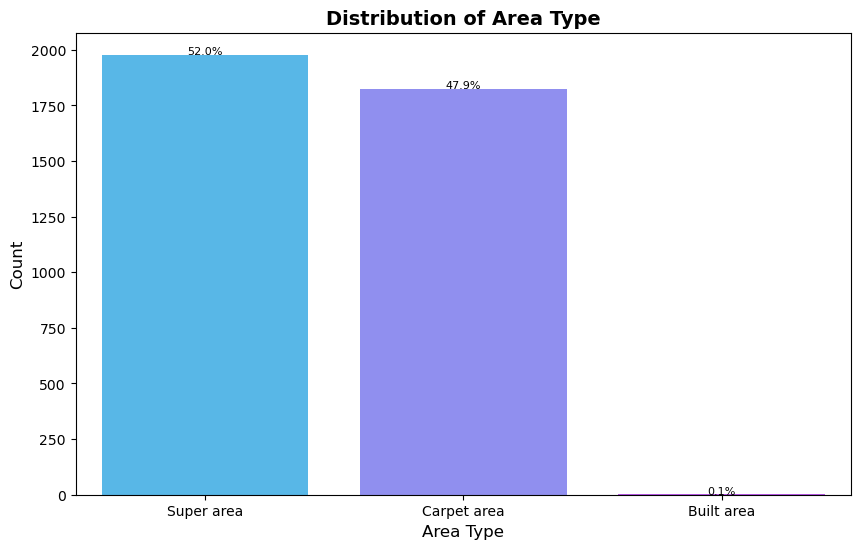

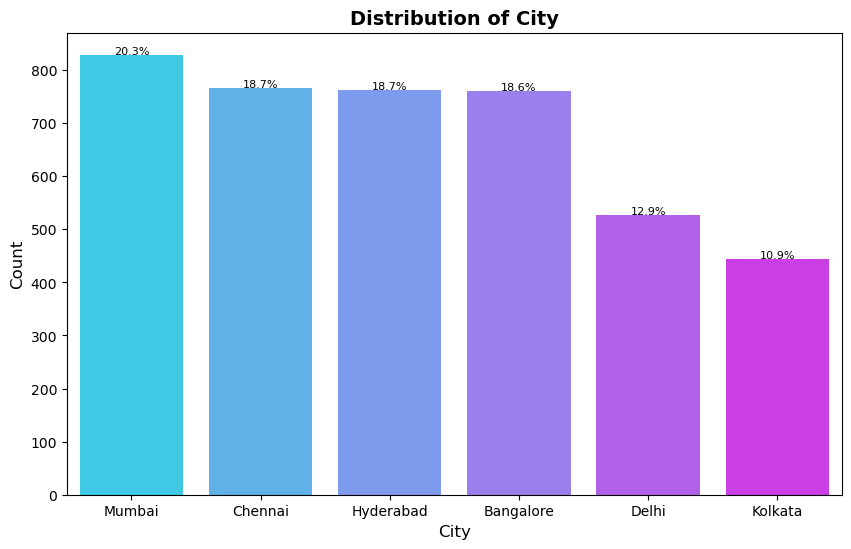

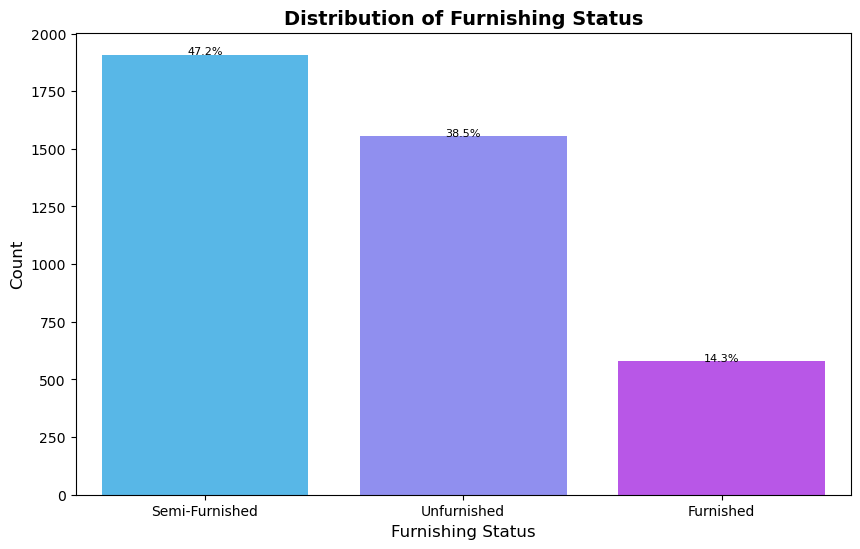

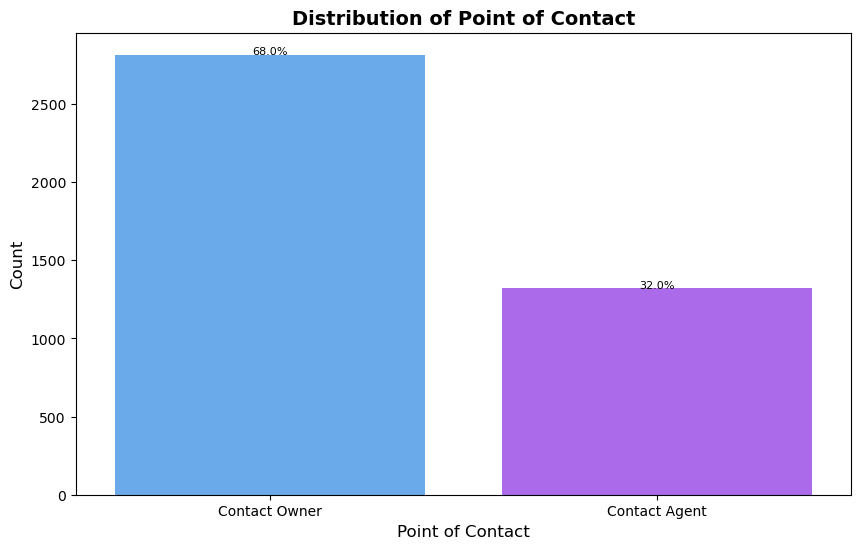

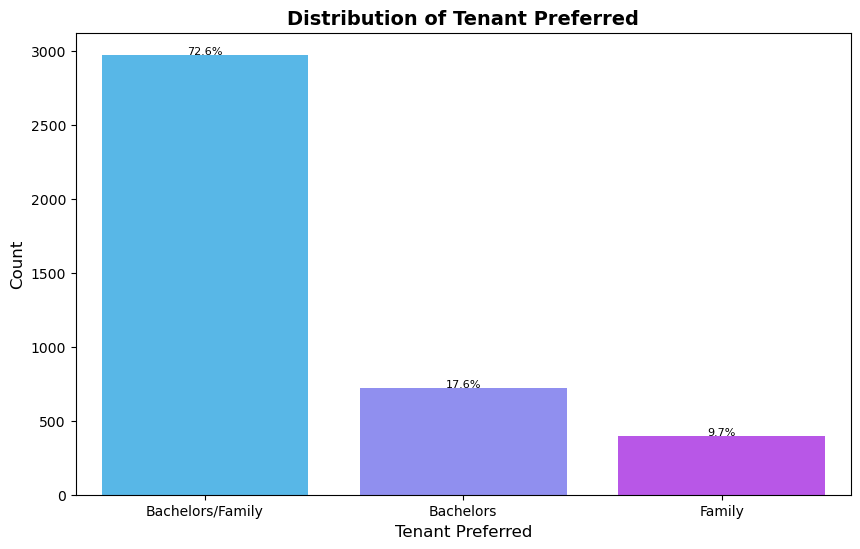

In [54]:
def cat_bar_plot(column, df):
    plt.figure(figsize=(10, 6))

    data_counts = df[column].value_counts()
    total = data_counts.sum()
    percentages = (data_counts / total) * 100
    ax = sns.barplot(x=data_counts.index, y=data_counts.values, palette="cool")
    for i, count in enumerate(data_counts.values):
        percentage = f"{percentages[i]:.1f}%"
        ax.text(i, count + 0.5, percentage, ha='center', fontsize=8,  color='black')

    plt.xlabel(column, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.title(f"Distribution of {column}", fontsize=14, fontweight='bold')

    plt.xticks(rotation=0)
    plt.show()
for column in Cat_columns.difference(['Posted On','Area Locality','Floor']):
    cat_bar_plot(column,df)

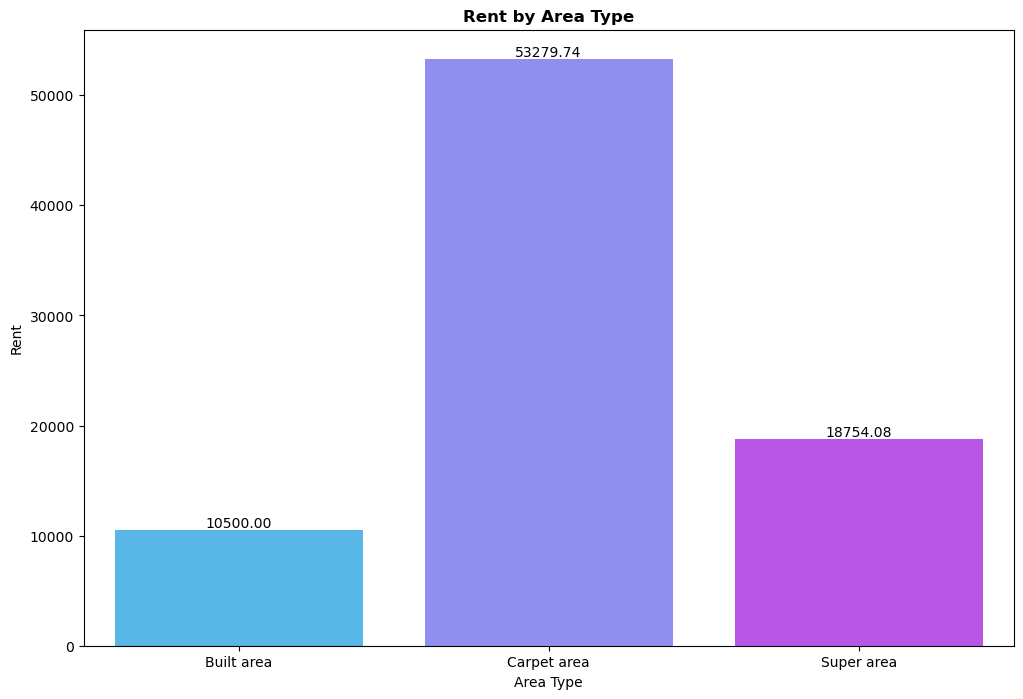

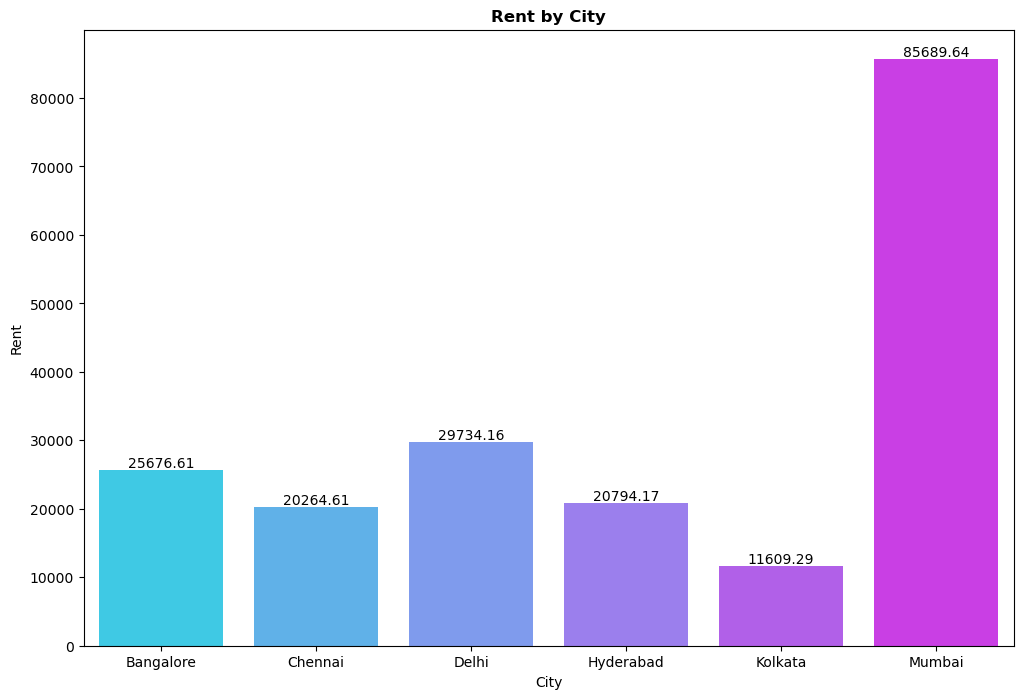

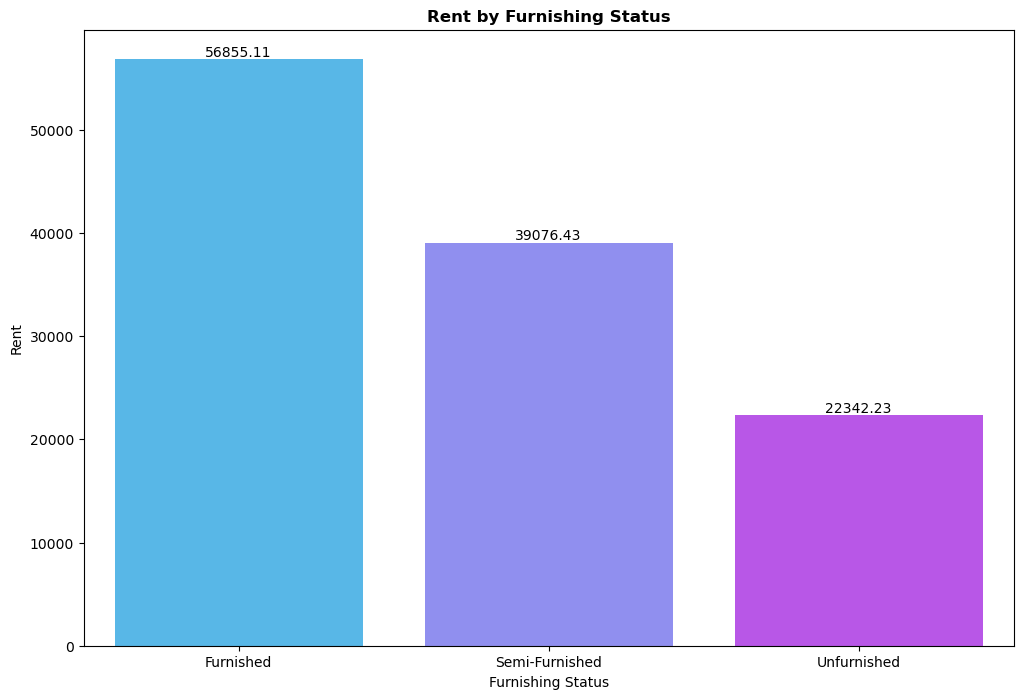

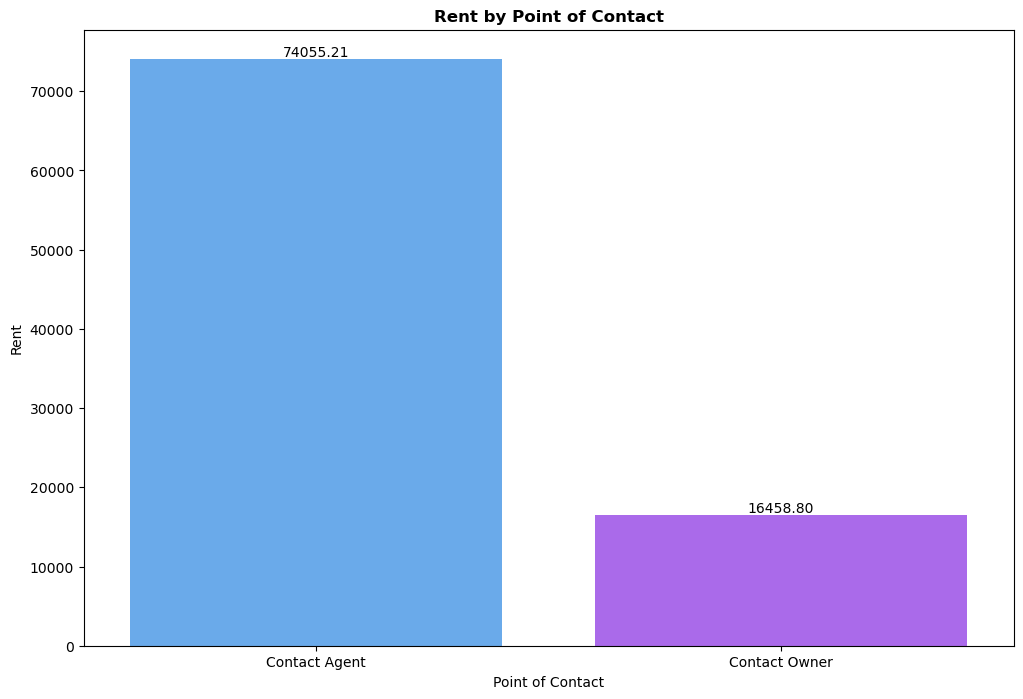

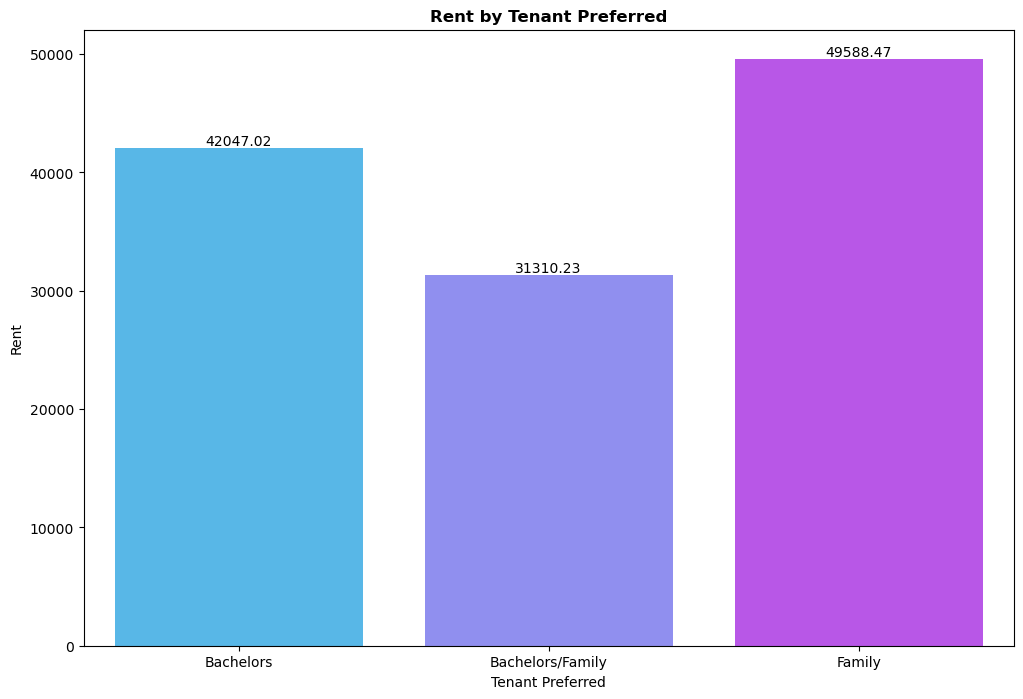

In [55]:
def cat_target_bar_plot(column):
    data = df.groupby(column)['Rent'].mean().reset_index()
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x=column,y='Rent',data=data,palette='cool',errorbar=None)
    plt.title(f'Rent by {column}',fontdict={'fontweight':'bold'})
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, color='black')
    plt.xticks(rotation=0)
    plt.show()
for column in Cat_columns.difference(['Posted On','Area Locality','Floor']):
    cat_target_bar_plot(column)

In [56]:
df['Posted On'].unique()

array([nan, '2022-05-13', '2022-05-16', '2022-07-04', '2022-05-09',
       '2022-04-29', '2022-06-21', '2022-06-07', '2022-05-23',
       '2022-05-05', '2022-05-17', '2022-06-20', '2022-06-09',
       '2022-06-14', '2022-05-28', '2022-05-22', '2022-06-25',
       '2022-06-22', '2022-05-21', '2022-06-26', '2022-06-16',
       '2022-06-29', '2022-05-10', '2022-05-12', '2022-05-31',
       '2022-06-10', '2022-06-06', '2022-05-20', '2022-07-02',
       '2022-07-03', '2022-04-23', '2022-05-14', '2022-05-27',
       '2022-06-19', '2022-07-06', '2022-06-04', '2022-06-24',
       '2022-05-18', '2022-05-30', '2022-06-18', '2022-06-08',
       '2022-05-03', '2022-05-07', '2022-06-27', '2022-04-28',
       '2022-06-28', '2022-06-23', '2022-06-13', '2022-05-15',
       '2022-05-04', '2022-04-25', '2022-05-06', '2022-06-30',
       '2022-07-01', '2022-06-17', '2022-05-26', '2022-05-11',
       '2022-06-12', '2022-06-05', '2022-06-11', '2022-05-25',
       '2022-06-01', '2022-04-30', '2022-05-24', '

In [57]:
df['Month']= df['Posted On'].str.split('-', n=3).str[1]
df['Month'].unique()

array([nan, '05', '07', '04', '06'], dtype=object)

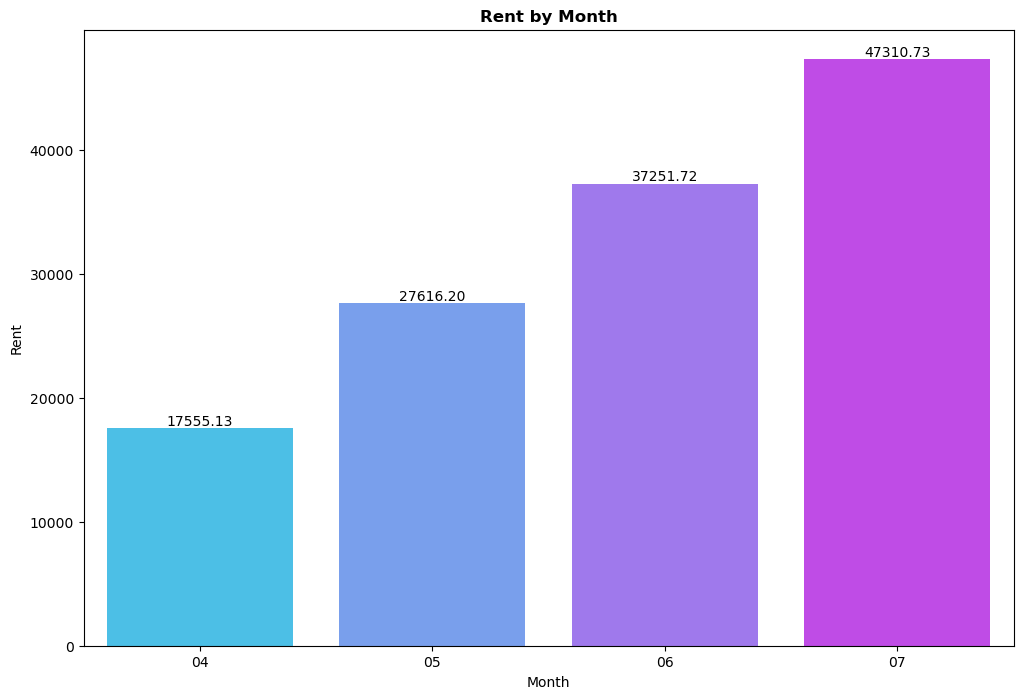

In [58]:
cat_target_bar_plot('Month')

<Axes: >

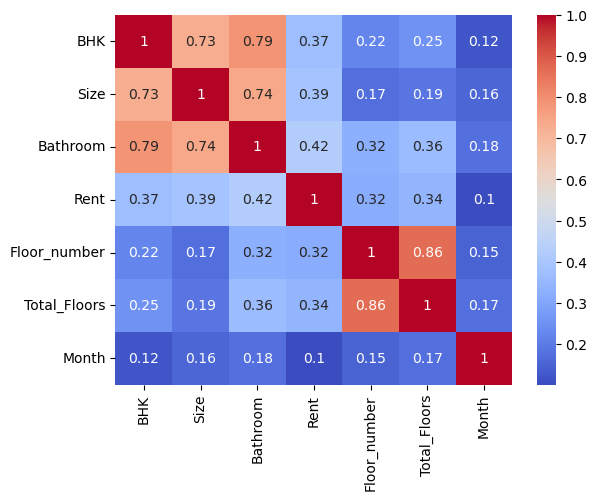

In [59]:
df['Month'] = pd.to_numeric(df['Month'])
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [60]:
df['Month'].value_counts()

Month
6.0    1589
5.0    1460
7.0     840
4.0     195
Name: count, dtype: int64

In [61]:
df['Month'].isna().sum()

662

In [62]:
df.loc[df['Rent'] == df['Rent'].max(),:]

,Posted On,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Rent,Floor_number,Total_Floors,Month
1837,2022-06-08,3.0,2500.0,4 out of 4,Carpet area,Marathahalli,Bangalore,Semi-Furnished,Bachelors,3.0,Contact Agent,3500000,4.0,4.0,6.0


In [63]:
df.loc[(df['Size'] == 2500.0) & (df['City'] == 'Bangalore'),:]

,Posted On,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Rent,Floor_number,Total_Floors,Month
1837,2022-06-08,3.0,2500.0,4 out of 4,Carpet area,Marathahalli,Bangalore,Semi-Furnished,Bachelors,3.0,Contact Agent,3500000,4.0,4.0,6.0
2121,2022-05-15,4.0,2500.0,1 out of 2,Super area,Basaveshvara Nagar,Bangalore,Semi-Furnished,Family,4.0,Contact Owner,60000,1.0,2.0,5.0
2213,2022-06-16,3.0,2500.0,NaN,Carpet area,Mahatma Gandhi Road,Bangalore,Unfurnished,NaN,3.0,Contact Agent,180000,NaN,NaN,6.0


In [64]:
df.loc[df['Rent'] >= 1e6 ,'Rent'] = df.loc[df['Rent'] >= 1e6 ,'Rent']/10
df['Rent'].describe()

count      4746.000000
mean      33912.541087
std       55768.962019
min        1200.000000
25%       10000.000000
50%       16000.000000
75%       33000.000000
max      850000.000000
Name: Rent, dtype: float64

In [65]:
1.5*(33000 - 10000) + 33000

67500.0

In [66]:
df.loc[df['Rent'] >= 500000.0 ,:]

,Posted On,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Rent,Floor_number,Total_Floors,Month
726,NaN,4.0,2500.0,12 out of 13,NaN,"Mount Marry, Bandra West",Mumbai,Semi-Furnished,NaN,4.0,Contact Agent,600000,12.0,13.0,NaN
792,2022-06-13,5.0,3200.0,10 out of 16,Carpet area,Bandra East,Mumbai,NaN,Bachelors/Family,5.0,Contact Agent,600000,10.0,16.0,6.0
1023,2022-07-09,NaN,3900.0,4 out of 6,NaN,Altamount Road,Mumbai,Furnished,Bachelors/Family,5.0,Contact Agent,500000,4.0,6.0,7.0
1319,2022-05-31,5.0,NaN,8 out of 10,Carpet area,Khar West,Mumbai,NaN,Bachelors/Family,5.0,Contact Agent,650000,8.0,10.0,5.0
1329,2022-06-23,4.0,NaN,2 out of 4,Carpet area,Breach Candy,Mumbai,Furnished,Bachelors/Family,4.0,Contact Agent,850000,2.0,4.0,6.0
1384,2022-05-27,5.0,4500.0,7 out of 20,Carpet area,Bandra West,NaN,Furnished,Bachelors,NaN,Contact Agent,600000,7.0,20.0,5.0
1459,2022-06-27,4.0,3200.0,24 out of 24,Carpet area,"Lady Ratan Tower, Worli",Mumbai,Furnished,Bachelors/Family,NaN,NaN,700000,24.0,24.0,6.0
1484,2022-07-07,4.0,1962.0,18 out of 20,NaN,Khar West,Mumbai,Semi-Furnished,Bachelors/Family,5.0,Contact Agent,680000,18.0,20.0,7.0
2750,NaN,4.0,NaN,NaN,Carpet area,Anand Niketan,Delhi,Semi-Furnished,Bachelors/Family,5.0,Contact Agent,530000,NaN,NaN,NaN
3656,2022-07-06,NaN,950.0,1 out of 1,NaN,Vettuvankeni,NaN,Unfurnished,Bachelors,2.0,Contact Owner,600000,1.0,1.0,7.0


In [67]:
df.loc[(df['Size'] == 2500.0) & (df['City'] == 'Mumbai'),:]

,Posted On,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Rent,Floor_number,Total_Floors,Month
601,2022-07-06,3.0,2500.0,47 out of 89,Carpet area,"India Bulls Sky Forest, Lower Parel",Mumbai,Semi-Furnished,Bachelors,3.0,Contact Agent,300000,47.0,89.0,7.0
726,NaN,4.0,2500.0,12 out of 13,NaN,"Mount Marry, Bandra West",Mumbai,Semi-Furnished,NaN,4.0,Contact Agent,600000,12.0,13.0,NaN
923,2022-07-06,4.0,2500.0,3 out of 7,Carpet area,Khar West,Mumbai,NaN,Bachelors/Family,4.0,Contact Agent,260000,3.0,7.0,7.0
1093,NaN,4.0,2500.0,24 out of 55,Carpet area,"Island City Centre, Dadar East",Mumbai,NaN,Bachelors/Family,6.0,Contact Agent,280000,24.0,55.0,NaN
1112,2022-06-11,4.0,2500.0,2 out of 8,Carpet area,NaN,Mumbai,Unfurnished,Bachelors/Family,4.0,Contact Agent,250000,2.0,8.0,6.0
1344,2022-06-22,4.0,2500.0,NaN,Carpet area,Bandra West,Mumbai,Furnished,Bachelors/Family,NaN,NaN,400000,NaN,NaN,6.0


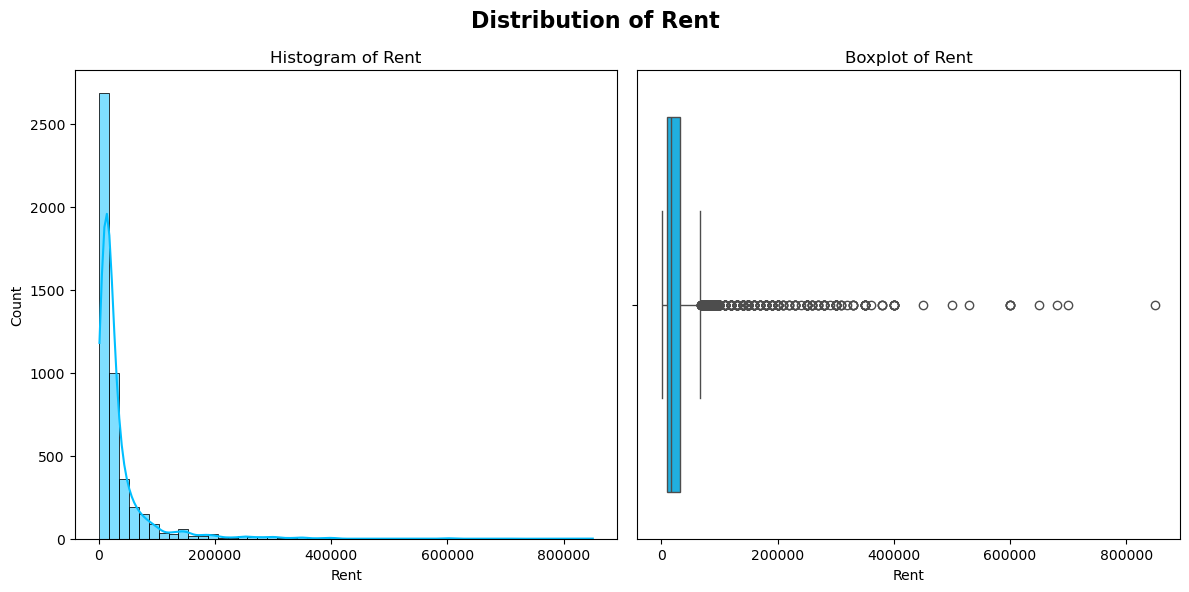

In [68]:
num_plot('Rent')

In [69]:
df.loc[(df['Rent'] >= 67500.0) & (df['City'] == 'Mumbai'),:]

,Posted On,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Rent,Floor_number,Total_Floors,Month
525,2022-06-14,2.0,750.0,4 out of 10,Carpet area,Santacruz West,Mumbai,NaN,Bachelors/Family,2.0,Contact Agent,70000,4.0,10.0,6.0
527,2022-05-27,NaN,1100.0,2 out of 13,Carpet area,"Sabari Palm View, Chembur",Mumbai,Unfurnished,Family,NaN,Contact Agent,75000,2.0,13.0,5.0
530,2022-06-20,2.0,800.0,14 out of 14,Carpet area,parivar safalya chs,Mumbai,Unfurnished,Bachelors/Family,2.0,Contact Owner,160000,14.0,14.0,6.0
531,2022-07-07,NaN,1600.0,43 out of 78,NaN,"Trump Tower, Worli",Mumbai,Semi-Furnished,Bachelors/Family,NaN,NaN,300000,43.0,78.0,7.0
540,2022-07-09,2.0,777.0,18 out of 24,Carpet area,"Hiranandani Castle Rock, Powai",Mumbai,Semi-Furnished,Bachelors/Family,2.0,NaN,85000,18.0,24.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,2022-07-09,3.0,1100.0,6 out of 12,Carpet area,Waterfield Road,Mumbai,Semi-Furnished,Bachelors/Family,3.0,NaN,140000,6.0,12.0,7.0
1488,NaN,2.0,NaN,14 out of 22,Carpet area,Andheri West,Mumbai,Semi-Furnished,Bachelors/Family,2.0,Contact Agent,78000,14.0,22.0,NaN
1489,2022-05-25,4.0,NaN,24 out of 60,Carpet area,NaN,Mumbai,Semi-Furnished,Bachelors/Family,NaN,Contact Agent,280000,24.0,60.0,5.0
1494,NaN,3.0,1120.0,8 out of 45,Carpet area,"DB Woods, Gokuldham",Mumbai,Furnished,Family,2.0,Contact Agent,90000,8.0,45.0,NaN


In [70]:
df.loc[(df['Rent'] >= 67500.0) & (df['City'] != 'Mumbai'),:]

,Posted On,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Rent,Floor_number,Total_Floors,Month
104,NaN,2.0,NaN,NaN,Carpet area,"Avenue S, Santoshpur",Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner,180000,NaN,NaN,NaN
533,2022-07-07,NaN,NaN,13 out of 18,Carpet area,"Ajmera Bhakti Park, Bhakti Park",NaN,Semi-Furnished,Bachelors/Family,4.0,NaN,130000,13.0,18.0,7.0
542,2022-06-21,3.0,1800.0,3 out of 7,NaN,NaN,NaN,NaN,Bachelors/Family,4.0,Contact Agent,270000,3.0,7.0,6.0
543,2022-07-04,5.0,2308.0,17 out of 31,Carpet area,"Runwal Elegante, Andheri West",NaN,Furnished,Family,5.0,NaN,400000,17.0,31.0,7.0
578,NaN,2.0,700.0,25 out of 41,Carpet area,"Lodha New Cuffe Parade, Wadala",NaN,Semi-Furnished,Bachelors/Family,2.0,Contact Agent,85000,25.0,41.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4523,2022-06-21,3.0,2780.0,4 out of 26,Super area,Nanakram Guda,Hyderabad,Semi-Furnished,Bachelors/Family,3.0,Contact Agent,70000,4.0,26.0,6.0
4543,2022-06-11,4.0,NaN,1 out of 35,Carpet area,K P H B Phase 4,Hyderabad,Semi-Furnished,Bachelors,6.0,Contact Owner,200000,1.0,35.0,6.0
4648,2022-07-06,NaN,4500.0,1 out of 2,Super area,"Kakateeya Nagar, Secunderabad",Hyderabad,Semi-Furnished,Bachelors/Family,6.0,NaN,80000,1.0,2.0,7.0
4669,NaN,4.0,3789.0,NaN,NaN,"Gachibowli CUC, Outer Ring Road",Hyderabad,Semi-Furnished,NaN,5.0,Contact Agent,140000,NaN,NaN,NaN


<Axes: xlabel='Total_Floors', ylabel='Rent'>

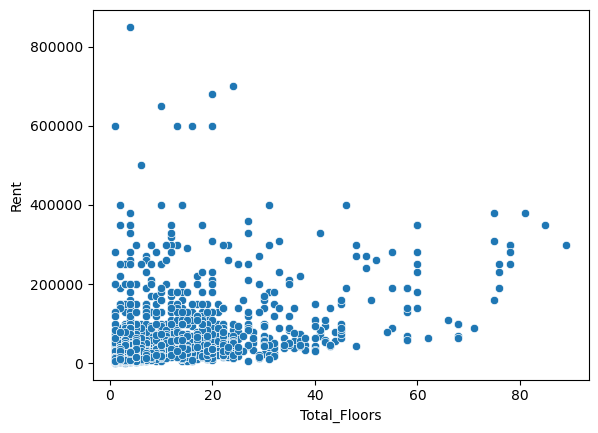

In [71]:
sns.scatterplot(x='Total_Floors',y='Rent',data=df)

<Axes: >

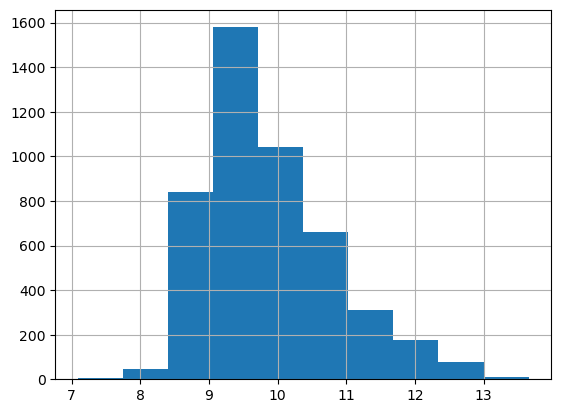

In [72]:
np.log1p(df['Rent']).hist()

<Axes: >

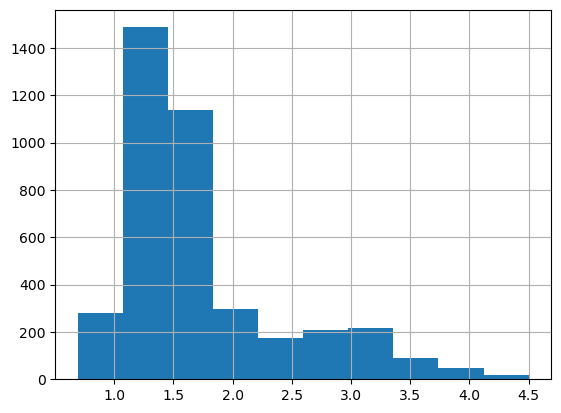

In [73]:
np.log1p(df['Total_Floors']).hist()

<Axes: >

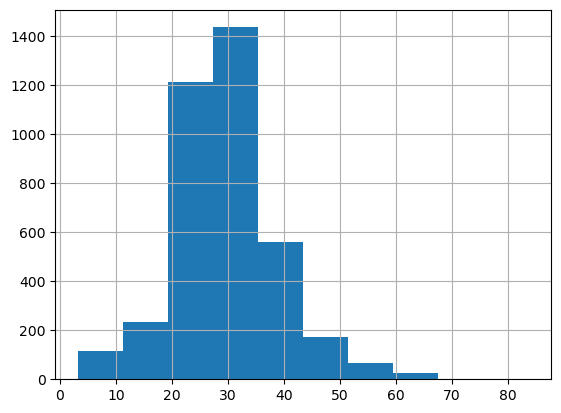

In [74]:
np.sqrt(df['Size']).hist()

<Axes: >

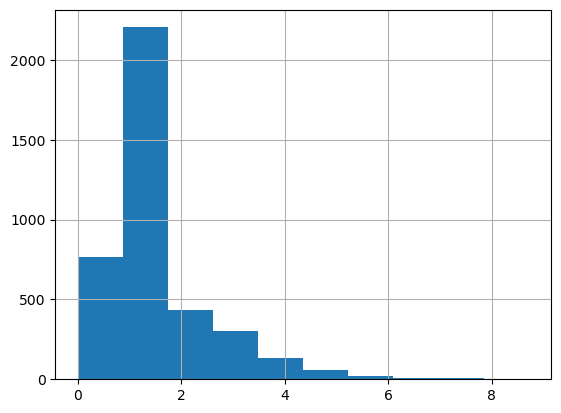

In [75]:
np.sqrt(df['Floor_number']).hist()

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint
X = df.drop(columns='Rent')
y = np.log1p(df['Rent'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df.columns

Index(['Posted On', 'BHK', 'Size', 'Floor', 'Area Type', 'Area Locality',
       'City', 'Furnishing Status', 'Tenant Preferred', 'Bathroom',
       'Point of Contact', 'Rent', 'Floor_number', 'Total_Floors', 'Month'],
      dtype='object')

In [77]:
log_cols = ['Total_Floors']
sqrt_cols = ['Size','Floor_number']
num_columns = ['Total_Floors','Size','Floor_number']
nominal_cols = ['Area Type']
ordinal_cols = ['Month','City','BHK','Bathroom','Furnishing Status','Tenant Preferred','Point of Contact']
def fillna_general(df, target_column, feature_columns):
  grouped_dict = df.groupby(feature_columns)[target_column].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).to_dict()
  df.loc[df[target_column].isna(), target_column] = df[df[target_column].isna()].apply(
      lambda row : grouped_dict.get(tuple(row[feature] for feature in feature_columns),row[target_column]),axis=1)

  return df
class FillNaNTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, col_to_fill, ref_cols):
        self.col_to_fill = col_to_fill
        self.ref_cols = ref_cols

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        for col, refs in zip(self.col_to_fill, self.ref_cols):
            X = fillna_general(X, col, refs)
            return X

    def get_feature_names_out(self, input_features=None):
        return X_train.columns
fill_columns = {
    'BHK': ['Bathroom', 'Size'],
    'Size': ['BHK', 'Bathroom'],
    'Bathroom': ['Size', 'BHK'],
    'Floor_number': ['City'],
    'Total_Floors': ['City','Area Locality'],
    'Area Type': ['Size', 'City'],
    'City':  ['Size','Total_Floors'],
    'Furnishing Status': ['City'],
    'Tenant Preferred': ['Size','BHK'],
    'Point of Contact': ['Furnishing Status','City'],
    'Month' : ['Size','Bathroom','Rent']
}
Nan_pipeline = Pipeline([
    ("fill_nan", FillNaNTransformer(list(fill_columns.keys()), list(fill_columns.values())))
])

function_transformer = ColumnTransformer([
    ('log', FunctionTransformer(np.log1p, feature_names_out="one-to-one"), log_cols),
    ('sqrt', FunctionTransformer(np.sqrt, feature_names_out="one-to-one"), sqrt_cols)
], remainder='passthrough')

num_pipeline = Pipeline([

    ("impute_median", SimpleImputer(strategy="median")),
    ('poly', PolynomialFeatures()),
    ("scale", StandardScaler())
])

Nominal_pipeline = Pipeline([
    ("impute_frequent", SimpleImputer(strategy="most_frequent")),
    ("one_hot", OneHotEncoder(handle_unknown="ignore"))
])

Ordinal_pipeline = Pipeline([
    ("impute_frequent", SimpleImputer(strategy="most_frequent")),
    ("ordinal_encode", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])


preprocessor = ColumnTransformer([
    ('numeric', make_pipeline(function_transformer, num_pipeline), num_columns),
    ('nominal', Nominal_pipeline, nominal_cols),
    ('ordinal', Ordinal_pipeline, ordinal_cols)
])
final_pipeline = Pipeline([
    ('fill_na', Nan_pipeline),
    ('preprocessor', preprocessor)
])
X_train_prep_df = pd.DataFrame(final_pipeline.fit_transform(X_train), columns=final_pipeline.get_feature_names_out())
X_train_prep_df.isna().sum()

numeric__1                                       0
numeric__log__Total_Floors                       0
numeric__sqrt__Size                              0
numeric__sqrt__Floor_number                      0
numeric__log__Total_Floors^2                     0
numeric__log__Total_Floors sqrt__Size            0
numeric__log__Total_Floors sqrt__Floor_number    0
numeric__sqrt__Size^2                            0
numeric__sqrt__Size sqrt__Floor_number           0
numeric__sqrt__Floor_number^2                    0
nominal__Area Type_Built area                    0
nominal__Area Type_Carpet area                   0
nominal__Area Type_Super area                    0
ordinal__Month                                   0
ordinal__City                                    0
ordinal__BHK                                     0
ordinal__Bathroom                                0
ordinal__Furnishing Status                       0
ordinal__Tenant Preferred                        0
ordinal__Point of Contact      

In [78]:
X_train_prep_df.head(3)

,numeric__1,numeric__log__Total_Floors,numeric__sqrt__Size,numeric__sqrt__Floor_number,numeric__log__Total_Floors^2,numeric__log__Total_Floors sqrt__Size,numeric__log__Total_Floors sqrt__Floor_number,numeric__sqrt__Size^2,numeric__sqrt__Size sqrt__Floor_number,numeric__sqrt__Floor_number^2,nominal__Area Type_Built area,nominal__Area Type_Carpet area,nominal__Area Type_Super area,ordinal__Month,ordinal__City,ordinal__BHK,ordinal__Bathroom,ordinal__Furnishing Status,ordinal__Tenant Preferred,ordinal__Point of Contact
0,0.0,0.736683,0.156874,0.960315,0.500634,0.576928,0.626863,0.014415,0.807348,0.545869,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1,0.0,-0.144736,-0.141639,0.271025,-0.259939,-0.200871,-0.067691,-0.250626,0.126491,-0.036023,0.0,0.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0
2,0.0,-0.479352,-0.722600,-0.034342,-0.487168,-0.661864,-0.289115,-0.701197,-0.283810,-0.229988,0.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0
